Aqui veremos como diminuir as dimensões de um DataFrame.

1 - Econtrar e excluir variáveis constantes / nulas;

2 - Encontrar variáveis altamente correlacionadas (heatmap) e excluir uma de cada par;

dessa forma, a acurácia da previsão com os dados de menos dimensões deve se manter a mesma dos dados de todas as dimensões.

Diminuir a dimensionalidade dos dados serve para evitar o overfitting para determinada base de dados. 

Por fim, automatizaremos esse processo.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"

dados = pd.read_csv(url)
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
print(dados.isnull().sum())

colunas_x = ['exame_1','exame_2','exame_3','exame_4',
             'exame_5','exame_6','exame_7','exame_8',
             'exame_9','exame_10','exame_11','exame_12',
             'exame_13','exame_14','exame_15','exame_16',
             'exame_17','exame_18','exame_19','exame_20',
             'exame_21','exame_22','exame_23','exame_24',
             'exame_25','exame_26','exame_27','exame_28',
             'exame_29','exame_30','exame_31','exame_32']
             #'exame_33'] ## a coluna 33 possui 75% dos dados nulos

x = dados[colunas_x]
y = dados['diagnostico']

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64


In [3]:
SEED = 123143
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)

In [4]:
modeloSVC = SVC(random_state=SEED)
modeloSVC.fit(x_treino, y_treino)
previsoesSVC = modeloSVC.predict(x_teste)

acuraciaSVC = accuracy_score(y_teste, previsoesSVC)
print("A acurácia do modelo SVC foi de %.2f%%" % (acuraciaSVC * 100))
# A acurácia do modelo SVC foi de 86.01%

modeloRandomForest = RandomForestClassifier(n_estimators = 100, random_state=SEED)
modeloRandomForest.fit(x_treino, y_treino)
previsoesRandomForest = modeloRandomForest.predict(x_teste)

acuraciaRandomForest = modeloRandomForest.score(x_teste, y_teste)
print("A acurácia do modelo Random Forest foi de %.2f%%" % (acuraciaRandomForest * 100))
# A acurácia do modelo Random Forest foi de 94.41%

A acurácia do modelo SVC foi de 86.01%
A acurácia do modelo Random Forest foi de 94.41%


In [5]:
## Classificador para obter a acurácia base:

modeloDummy = DummyClassifier(strategy='most_frequent', random_state=SEED)
modeloDummy.fit(x_treino, y_treino)
acuraciaDummy = modeloDummy.score(x_teste, y_teste)

print("A acurácia Dummy foi de %.2f%%" % (acuraciaDummy * 100))
# A acurácia Dummy foi de 62.94%


A acurácia Dummy foi de 62.94%


Como o RandomForest teve melhor acurácia do que o SVC, escolhemos o Random Forest.

Comparado ao Dummy, ele teve uma acuárcia muito superior, então usaremos a acurácia de 94.41% como base.

Com isso, podemos trabalhar as dimensões para verificar se conseguimos chegar em um conjunto de features ideal, na qual maximize a acurácia.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(x)
x_padronizado = padronizador.transform(x)
x_padronizado = pd.DataFrame(data=x_padronizado, columns=x.keys())

def grafico_violino(valores, inicio, fim):
    dados_violin = pd.concat([y, valores.iloc[:,inicio:fim]], axis=1)
    dados_violin = pd.melt(dados_violin, id_vars="diagnostico", var_name="exames", value_name="valores")
    dados_violin.head()

    plt.figure(figsize=(22,8))
    plt.xticks(rotation=90)
    sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_violin, split=True)

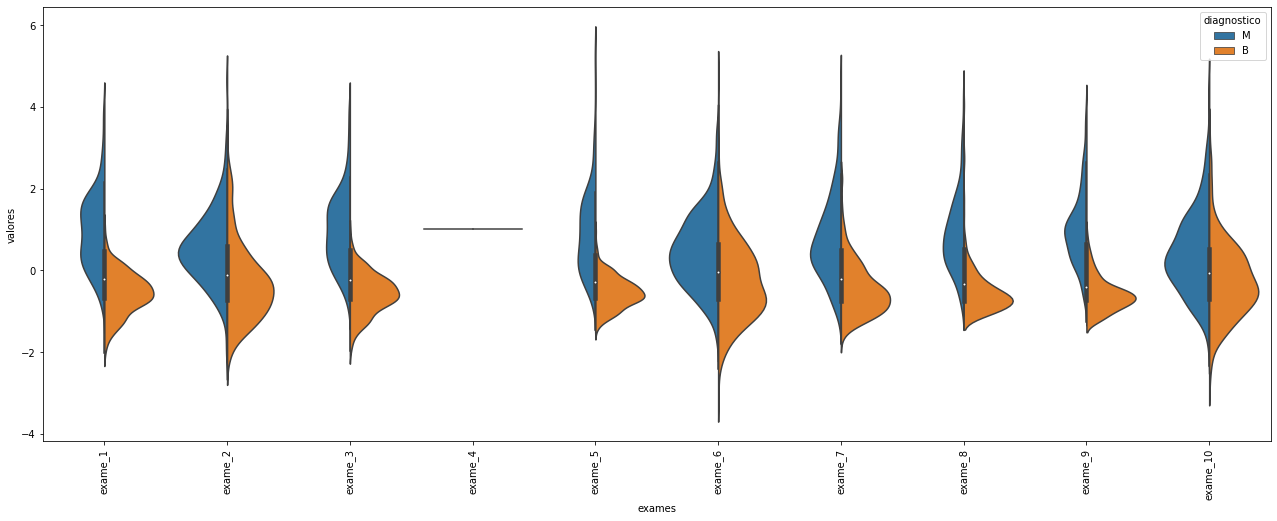

In [7]:
grafico_violino(x_padronizado, 0, 10)

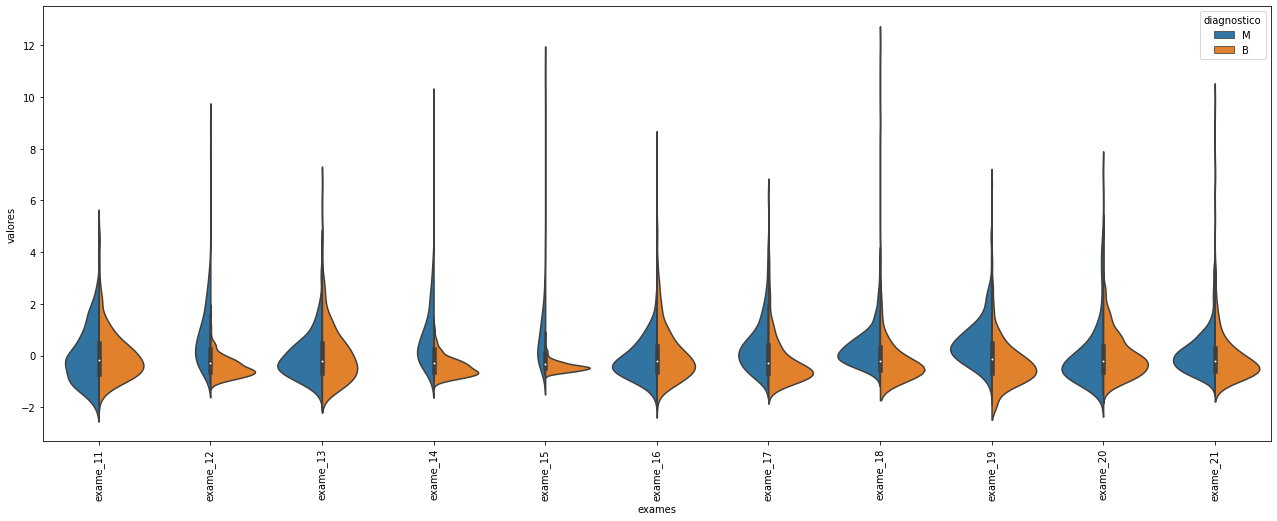

In [8]:
grafico_violino(x_padronizado, 10, 21)

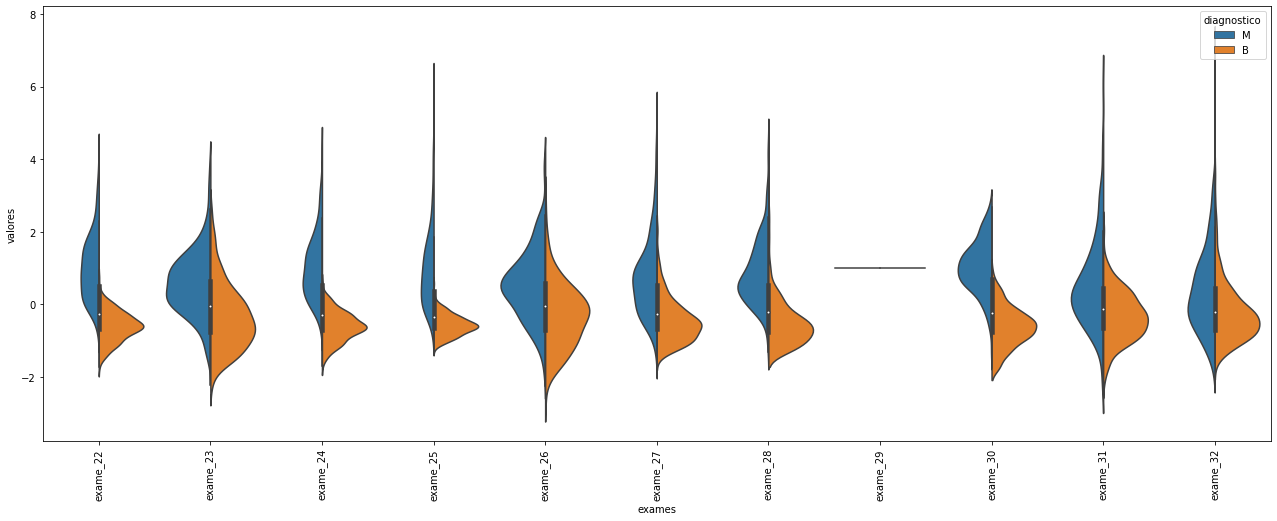

In [9]:
grafico_violino(x_padronizado, 21, 32)

Podemos dropar as variáveis constantes: Exame 4 e Exame 29

In [10]:
x_padronizado_sem_constantes = x_padronizado.drop(columns=['exame_4', 'exame_29'])

In [11]:
def classificar(valores):

    SEED = 123143
    x_treino, x_teste, y_treino, y_teste = train_test_split(valores, y, test_size=0.25, random_state=SEED, stratify=y)

    modeloRandomForest = RandomForestClassifier(n_estimators = 100, random_state=SEED)
    modeloRandomForest.fit(x_treino, y_treino)
    previsoesRandomForest = modeloRandomForest.predict(x_teste)

    acuraciaRandomForest = modeloRandomForest.score(x_teste, y_teste)
    print("A acurácia do modelo Random Forest foi de %.2f%%" % (acuraciaRandomForest * 100))

In [12]:
classificar(x_padronizado_sem_constantes)

A acurácia do modelo Random Forest foi de 94.41%


Retirando 2 features (que eram constantes), nossa acurácia se mantem a mesma

Matriz de correlação dos dados:

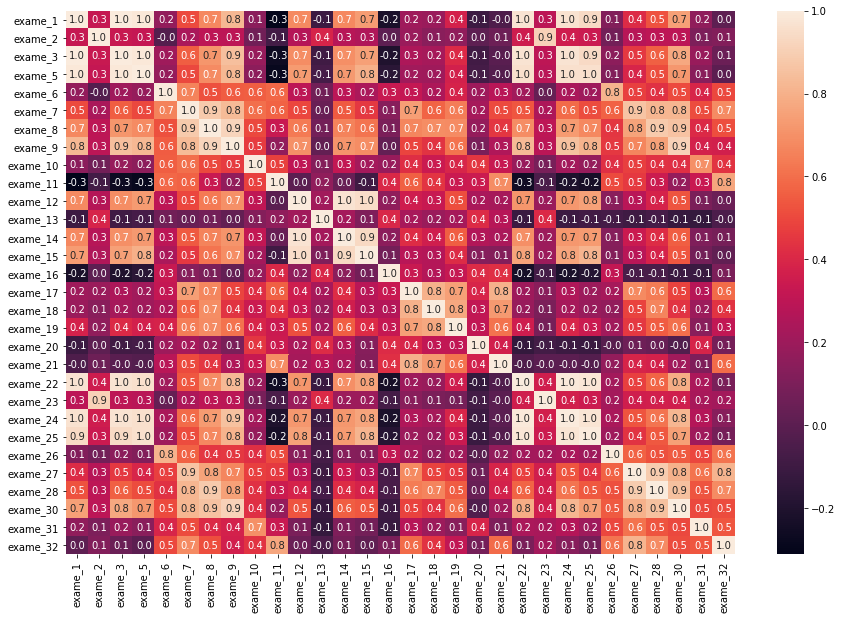

In [13]:
matriz_correlacao = x_padronizado_sem_constantes.corr()

plt.figure(figsize=(15,10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [14]:
# Retirando os exames altamente correlacionados:

matriz_correlacao_2 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_2.head() # valores com correlação quase perfeita

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
matriz_correlacao_3 = matriz_correlacao_2.sum()
matriz_correlacao_3

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [16]:
variaveis_correlacionadas = matriz_correlacao_3[matriz_correlacao_3 > 1]
variaveis_correlacionadas
# Exame_1
# Exame_3
# Exame_22
# Exame_24

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [17]:
x_sem_vars_altamente_correlacionadas = x_padronizado_sem_constantes.drop(columns=['exame_1','exame_3','exame_22','exame_24'])
x_sem_vars_altamente_correlacionadas.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
classificar(x_sem_vars_altamente_correlacionadas)

A acurácia do modelo Random Forest foi de 95.10%


Agora, vamos voltar um pouco e excluir apenas uma das variaveis que estão correlacionadas, por exemplo, se a var1 está correlacionada com a var3, em vez de excluir as duas, vamos excluir apenas uma:

In [19]:
x_sem_vars_altamente_correlacionadas = x_padronizado_sem_constantes.drop(columns=['exame_3','exame_24'])

In [20]:
classificar(x_sem_vars_altamente_correlacionadas)

A acurácia do modelo Random Forest foi de 94.41%


Nhééééé__¯\_(ツ)_/¯

Ou seja, excluimos mais duas dimensoes e a acurácia se manteve.

Agora, utilizaremos o SelectKBest para selecionar automaticamente as melhores dimensões:

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 ## ki quadrada que fala

dados = x
dados.drop(columns=['exame_4','exame_29','exame_3', 'exame_24'])

x_treino, x_teste, y_treino, y_teste = train_test_split(dados, y, test_size=0.3)

k_melhores_features = SelectKBest(chi2, k=5) ## seleciona as 5 melhores features
k_melhores_features.fit(x_treino, y_treino)

treino_kbest = k_melhores_features.transform(x_treino) ## 5 Melhores features para treino
teste_kbest = k_melhores_features.transform(x_teste) ## 5 melhores features para teste

teste_kbest.shape

(171, 5)

In [22]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, y_treino)
previsoes = classificador.predict(teste_kbest)
acuracia = classificador.score(teste_kbest, y_teste)

print("Acurácia RandomForest com apenas 5 dimensões através do Kbest: %.2f%%" % (acuracia * 100))

Acurácia RandomForest com apenas 5 dimensões através do Kbest: 95.32%


A acurácia de 95% é muito boa, porém estamos errando mais quando é Maligno? Ou errando mais quando é benigno?

Podemos verificar isso com uma Confusion Matrix:

In [23]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste, previsoes) ## Valor real, predições
matriz_confusao

array([[104,   3],
       [  5,  59]])

[Text(30.5, 0.5, 'Valor Real'), Text(0.5, 12.5, 'Previsão')]

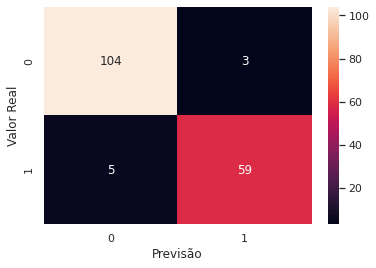

In [24]:
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Previsão", ylabel = "Valor Real")

Podemos também utilizar o RFE (Recursive Feature Elimination) para eliminar dimensões que não são necessárias:

Acurácia RandomForest com apenas 5 dimensões através do RFE: 95.32%


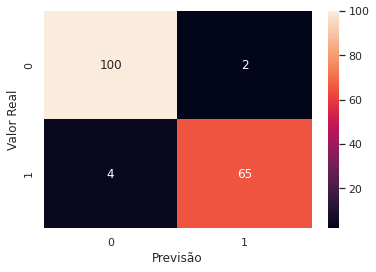

In [25]:
from sklearn.feature_selection import RFE

x_treino, x_teste, y_treino, y_teste = train_test_split(dados, y, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(x_treino, y_treino)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(x_treino, y_treino)

rfe_treino = selecionador_rfe.transform(x_treino)
rfe_teste = selecionador_rfe.transform(x_teste)

classificador.fit(rfe_treino, y_treino)
previsoes = classificador.predict(rfe_teste)
#acuracia = classificador.score(previsoes, y_teste)

matriz_confusao = confusion_matrix(y_teste, previsoes)

sns.set()
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Previsão", ylabel="Valor Real")

print("Acurácia RandomForest com apenas 5 dimensões através do RFE: %.2f%%" % (acuracia * 100))

Podemos plotar os dados utilizando o método TSNE para escolher duas dimensões (n_components) mantendo o maior número possível de informação:

- Ou o método PCA;

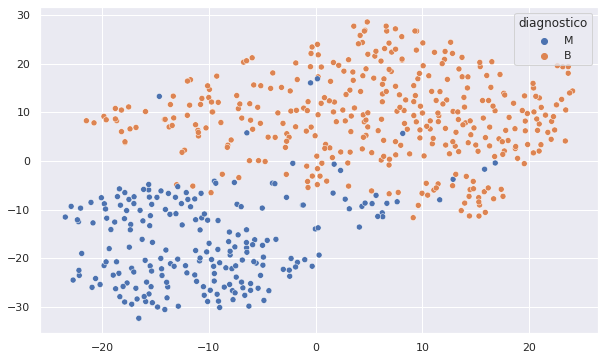

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2)
dados = tsne.fit_transform(x_padronizado_sem_constantes)

#pca = PCA(n_components=2)
#dados = pca.fit_transform(x_padronizado_sem_constantes)

plt.figure(figsize=(10,6))
sns.scatterplot(x=dados[:,0], y=dados[:,1], hue=y)